In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#load student performance data
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,0,72,72,74
1,female,group C,some college,standard,1,69,90,88
2,female,group B,master's degree,standard,0,90,95,93
3,male,group A,associate's degree,free/reduced,0,47,57,44
4,male,group C,some college,standard,0,76,78,75


In [3]:
#data cleaning
#no null values
df.isnull().sum()

gender                         0
race                           0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

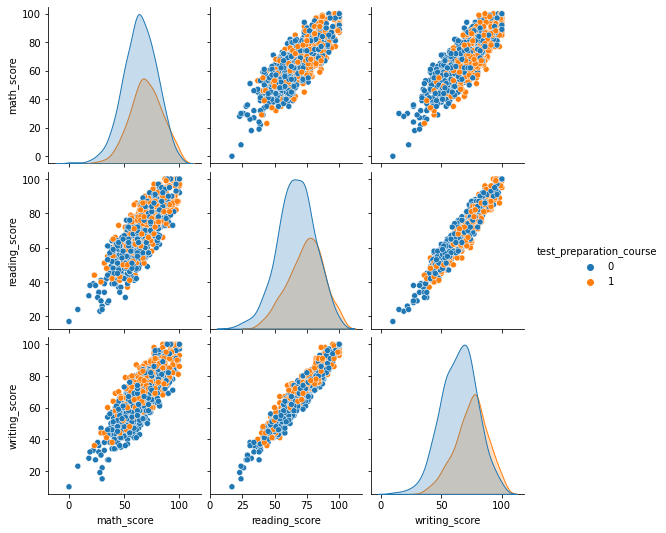

In [4]:
#EDA
sns.pairplot(df, hue='test_preparation_course')

In [5]:
#strong correlation between reading and writing scores 
#strong correlation between math with rearding and writing scores 
#test preparation have weak corralation with the other features
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,test_preparation_course,math_score,reading_score,writing_score
test_preparation_course,1.000000,0.177702,0.241780,0.312946
math_score,0.177702,1.000000,0.817580,0.802642
reading_score,0.241780,0.817580,1.000000,0.954598
writing_score,0.312946,0.802642,0.954598,1.000000


In [6]:
#Choose a target for classification. 
#target--> test preparation (although have weak correlation with other features)
#we will predect test preparation besed on students performance [math , reading ,writing scores] 

In [7]:
df.keys()

Index(['gender', 'race', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [8]:
vars = ['gender','race','parental_level_of_education','lunch','math_score','reading_score' ,'writing_score'] 


In [9]:
#Split the dataset into the Training set and Test set

X = df[vars]
y = df.test_preparation_course

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
#Feature engineering 
#One Hot Encoding  

one_hot = OneHotEncoder()
col_names = ["gender","lunch","race"]

# One Hot encode the column in both the train and validation sets
one_hot_df = one_hot.fit_transform(X_train[col_names]).toarray()
one_hot_df_test = one_hot.fit_transform(X_test[col_names]).toarray()

In [11]:
one_hot.categories_[0]

array(['female', 'male'], dtype=object)

In [12]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['gender_female',
 'gender_male',
 'lunch_free/reduced',
 'lunch_standard',
 'race_group A',
 'race_group B',
 'race_group C',
 'race_group D',
 'race_group E']

In [13]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["gender","lunch","race"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [14]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=X_train.index,
    columns = column_names
)

oh_df_test = pd.DataFrame(
    one_hot_df_test,
    index=X_test.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_test.shape)

(750, 9)
(250, 9)


In [15]:
# Create train_new df by merging train and one hot encoded df together and drop gender cols

X_train_new = X_train.merge(oh_df, on=X_train.index).set_index("key_0").drop(["gender","lunch","race"], axis=1)
X_test_new = X_test.merge(oh_df_test, on=X_test.index).set_index("key_0").drop(["gender","lunch","race"], axis=1)

print(X_train_new.shape)
print(X_test_new.shape)

(750, 13)
(250, 13)


In [16]:
X_train_new

,parental_level_of_education,math_score,reading_score,writing_score,gender_female,gender_male,lunch_free/reduced,lunch_standard,race_group A,race_group B,race_group C,race_group D,race_group E
key_0,,,,,,,,,,,,,
253,master's degree,80,80,72,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
667,bachelor's degree,77,85,87,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
85,some college,73,80,82,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
969,bachelor's degree,75,84,80,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
75,associate's degree,44,41,38,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,high school,60,64,74,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
192,some high school,62,64,66,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
629,some high school,44,51,55,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [17]:
#ordinal encoding
ordinal = OrdinalEncoder()

col_names = ["parental_level_of_education"]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(X_train[col_names])
ordinal_ls_test = ordinal.transform(X_test[col_names])

In [18]:
ordinal.categories_

[array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college', 'some high school'],
       dtype=object)]

In [19]:
# Add oridnally encoded column to the data
X_train_new["parental_level_of_education"] = ordinal_ls
X_test_new["parental_level_of_education"] = ordinal_ls_test

X_train_new.sample(5)

,parental_level_of_education,math_score,reading_score,writing_score,gender_female,gender_male,lunch_free/reduced,lunch_standard,race_group A,race_group B,race_group C,race_group D,race_group E
key_0,,,,,,,,,,,,,
893,5.0,88,74,75,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
195,0.0,61,55,52,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
188,5.0,48,52,45,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
914,0.0,46,61,55,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
260,5.0,64,79,77,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
#Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train_new, y_train)

C:\Users\esooo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [21]:
#predication
y_pred = classifier.predict(X_test_new)

print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0]


In [22]:
X_test_new = pd.DataFrame(X_test_new, columns= X_test_new.keys())

X_test_new['Actual'] = y_test.to_numpy()
X_test_new['Predict'] = y_pred

X_test_new

,parental_level_of_education,math_score,reading_score,writing_score,gender_female,gender_male,lunch_free/reduced,lunch_standard,race_group A,race_group B,race_group C,race_group D,race_group E,Actual,Predict
key_0,,,,,,,,,,,,,,,
993,1.0,62,72,74,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
859,0.0,87,73,72,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
298,2.0,40,46,50,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
553,4.0,77,62,64,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
672,4.0,69,78,76,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,4.0,71,70,76,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1
356,0.0,63,61,61,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0
2,3.0,90,95,93,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0


In [23]:
 #Counting the records when the actual and the predicitons are the same

(X_test_new['Actual'] == X_test_new['Predict']).value_counts()

True     173
False     77
dtype: int64

In [24]:
#Report your accuracy, recall, and precision on your test set at the end.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       164
           1       0.56      0.47      0.51        86

    accuracy                           0.69       250
   macro avg       0.65      0.64      0.64       250
weighted avg       0.68      0.69      0.68       250



In [25]:
#as there is a strong relationship between writng and reading scores features we will consider drop reading score feature 
#and train the model again 

In [26]:
# drop a column based on name
 
X_train_new.drop('reading_score',axis=1)
X_test_new.drop('reading_score',axis=1)

,parental_level_of_education,math_score,writing_score,gender_female,gender_male,lunch_free/reduced,lunch_standard,race_group A,race_group B,race_group C,race_group D,race_group E,Actual,Predict
key_0,,,,,,,,,,,,,,
993,1.0,62,74,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
859,0.0,87,72,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
298,2.0,40,50,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
553,4.0,77,64,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
672,4.0,69,76,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,4.0,71,76,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1
356,0.0,63,61,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0
2,3.0,90,93,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0


In [27]:
#Training the Logistic Regression model on the Training set
classifier2 = LogisticRegression(random_state = 5)

classifier2.fit(X_train_new, y_train)

C:\Users\esooo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       164
           1       0.56      0.47      0.51        86

    accuracy                           0.69       250
   macro avg       0.65      0.64      0.64       250
weighted avg       0.68      0.69      0.68       250



In [ ]:
#there is no effect shown after droping the reading score feature

The End :)